In [1]:
!pip install numpy pandas opencv-python PIL matplotlib tensorflow

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


In [3]:
# drive.mount('/content/drive')

In [ ]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects'
#base_dir='/content/drive/MyDrive/butterflyml/Pupae_defects/train/'
print(base_dir)
img_size = 224
batch = 64

C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects


In [5]:

# Create a data augmentor

train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,

                                   zoom_range=0.2, horizontal_flip=True,

                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,

                                  validation_split=0.2)

In [6]:
# Create datasets

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=( img_size, img_size),
                                                  subset='training',
                                                  batch_size=batch)

test_datagen = test_datagen.flow_from_directory(base_dir, target_size=( img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)


Found 110 images belonging to 6 classes.


Found 24 images belonging to 6 classes.


In [29]:
# # modelling starts using a CNN.

model = Sequential()
# model.add(Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)))
# model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(6, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [9]:

import keras
keras.utils.plot_model( model, show_shapes = True, show_dtype = True, show_layer_activations = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30


2/2 [==============================] - 42s 26s/step - loss: 1.9021 - accuracy: 0.1727 - val_loss: 1.6991 - val_accuracy: 0.2083
Epoch 2/30
2/2 [==============================] - 12s 6s/step - loss: 1.7093 - accuracy: 0.3000 - val_loss: 1.6381 - val_accuracy: 0.2917
Epoch 3/30
2/2 [==============================] - 13s 8s/step - loss: 1.7063 - accuracy: 0.2727 - val_loss: 1.5454 - val_accuracy: 0.2500
Epoch 4/30
2/2 [==============================] - 12s 7s/step - loss: 1.6283 - accuracy: 0.3545 - val_loss: 1.5174 - val_accuracy: 0.3750
Epoch 5/30
2/2 [==============================] - 13s 8s/step - loss: 1.5764 - accuracy: 0.2909 - val_loss: 1.4618 - val_accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 18s 10s/step - loss: 1.4943 - accuracy: 0.2727 - val_loss: 1.3795 - val_accuracy: 0.2500
Epoch 7/30
2/2 [==============================] - 13s 6s/step - loss: 1.4031 - accuracy: 0.3455 - val_loss: 1.1612 - val_accuracy: 0.5833
Epoch 8/30
2/2 [==============

In [12]:
from tensorflow.keras.models import load_model
model.save('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/model/defects_app.h5')


c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load model
savedModel=load_model('C:/Users/jerwin/Documents/GitHub/butterfly_photos/model/defects_app.h5')

In [14]:
train_datagen.class_indices

{'Ant bites': 0,
 'Deformed body': 1,
 'Healthy Pupae': 2,
 'Old Pupa': 3,
 'Overbend': 4,
 'Stretch abdomen': 5}

In [15]:
from keras.preprocessing import image

In [16]:
#Creating list for mapping

list_ =  ['Ant bites','Deformed body','Healthy Pupae','Old Pupa','Overbend','Stretch abdomen']

In [18]:
#Input image

test_image = image.load_img('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/Overbend/4_over_bend.jpg',target_size=(224,224))

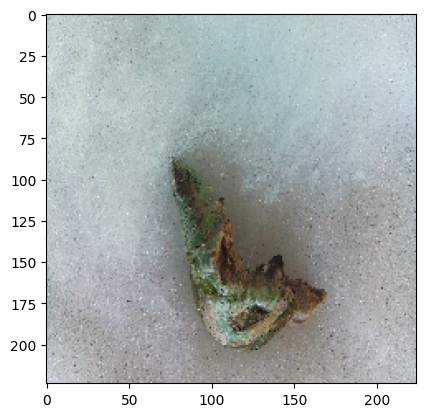

In [19]:
#For show image
plt.imshow(test_image)

In [20]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image,axis=0)

In [21]:
# Result array

result = savedModel.predict(test_image)

print(result)

1/1 [==============================] - 1s 933ms/step
[[0. 0. 0. 0. 1. 0.]]


In [23]:
#Mapping result array with the main name list

i=0

for i in range(len(result[0])):

  if(result[0][i]==1):

    print(list_[i])

    break


test_image = image.load_img('C:/Users/jerwin/Documents/GitHub/butterfly_photos/pupae defects/Overbend/4_over_bend.jpg',target_size=(224,224))

Overbend


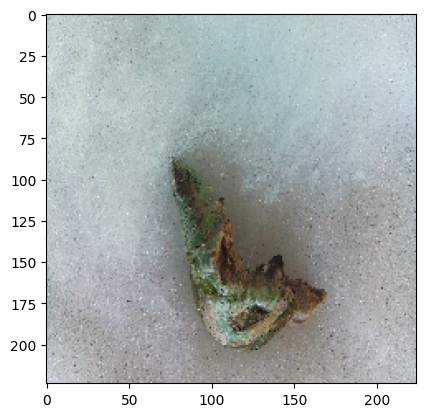

In [24]:
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [25]:
# Result array

result = savedModel.predict(test_image)
print(result)


1/1 [==============================] - 0s 104ms/step
[[0. 0. 0. 0. 1. 0.]]


In [26]:
#Mapping result array with the main name list

i=0

for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break


Overbend
